In [128]:
#Import packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from scipy import stats
from sklearn.model_selection import train_test_split
# classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import time
from math import sqrt
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.metrics import classification_report, confusion_matrix
# metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [129]:
# Importing Dataset
df = pd.read_csv('train_u6lujuX_CVtuZ9i.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [130]:
#Initial shape
df.shape

(614, 13)

In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


### Categorical Columns:

Gender (Male/Female),
Married (Yes/No),
Number of dependents (Possible values:0,1,2,3+),
Education (Graduate / Not Graduate),
Self-Employed (No/Yes),
credit history(Yes/No),
Property Area (Rural/Semi-Urban/Urban) and
Loan Status (Y/N)(i. e. Target variable)
Numerical Columns:

Loan ID,
Applicant Income,
Co-applicant Income,
Loan Amount, and
Loan amount term

In [132]:
df.drop('Loan_ID', inplace=True, axis='columns')

In [133]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [134]:
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [135]:
# Imputing the missing values:
df['Gender'].fillna(df['Gender'].mode()[0], inplace = True)
df['Married'].fillna(df['Married'].mode()[0], inplace = True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace = True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace = True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace = True)

In [136]:
data = df.copy()

In [137]:
# Next, we will be using Iterative imputer for filling missing values of LoanAmount and Loan_Amount_Term
data1 = data.loc[:,['LoanAmount','Loan_Amount_Term']]

from sklearn.ensemble import RandomForestRegressor
#Running the imputer with a Random Forest Estimator
imp = IterativeImputer(RandomForestRegressor(), max_iter=1000, random_state=0)
data1 = pd.DataFrame(imp.fit_transform(data1), columns=data1.columns)

data['LoanAmount'] = data1['LoanAmount']
data['Loan_Amount_Term'] = data1['Loan_Amount_Term']

In [138]:
# So now as we have imputed all the missing values we go on to mapping the categorical variables with the integers.
data['Gender'] = data['Gender'].map({'Male':0,'Female':1}).astype(int)
data['Married'] = data['Married'].map({'No':0,'Yes':1}).astype(int)
data['Education'] = data['Education'].map({'Not Graduate':0,'Graduate':1}).astype(int)
data['Self_Employed'] = data['Self_Employed'].map({'No':0,'Yes':1}).astype(int)
data['Credit_History'] = data['Credit_History'].astype(int)    

In [139]:
data['Property_Area'] = data['Property_Area'].map({'Urban':0,'Rural':1, 'Semiurban':2}).astype(int)
data['Dependents'] = data['Dependents'].map({'0':0, '1':1, '2':2, '3+':3})

In [140]:
#creating a new feature
data['Total_Income'] = data['ApplicantIncome'] + data['CoapplicantIncome']
data.drop(['ApplicantIncome', 'CoapplicantIncome'], axis='columns', inplace=True)
data.head()

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,0,0,0,1,0,146.584354,360.0,1,0,Y,5849.0
1,0,1,1,1,0,128.000000,360.0,1,1,N,6091.0
2,0,1,0,1,1,66.000000,360.0,1,0,Y,3000.0
3,0,1,0,0,0,120.000000,360.0,1,0,Y,4941.0
4,0,0,0,1,0,141.000000,360.0,1,0,Y,6000.0


In [141]:
 new_train = data.copy()

In [142]:
new_train['Loan_Status'] = new_train['Loan_Status'].map({'N':0,'Y':1}).astype(int)

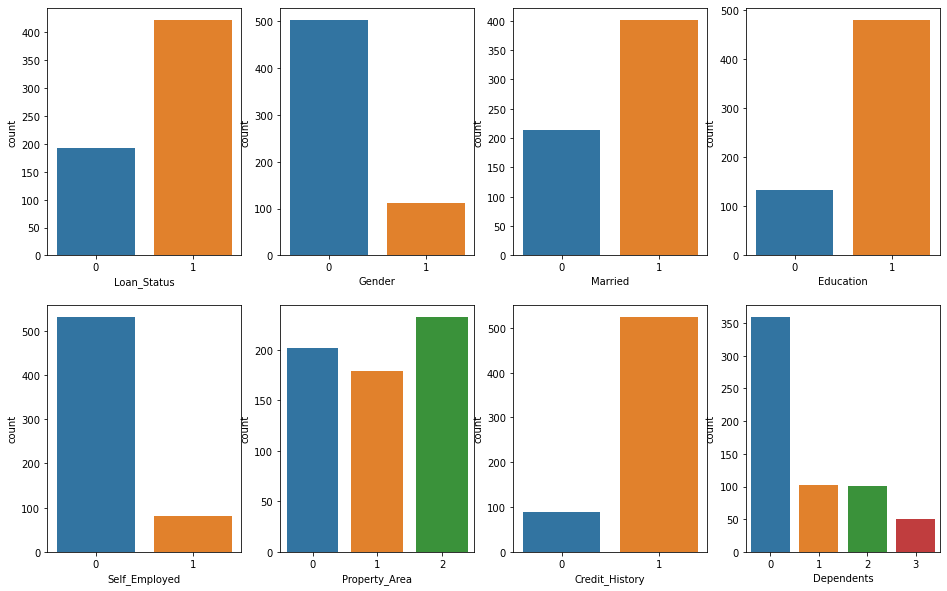

In [143]:
# Univariate Analysis:
fig,ax = plt.subplots(2,4,figsize=(16,10))
sns.countplot(x='Loan_Status', data = new_train, ax=ax[0][0])
sns.countplot(x='Gender', data = new_train, ax=ax[0][1])
sns.countplot(x='Married', data = new_train, ax=ax[0][2])
sns.countplot(x='Education', data = new_train, ax=ax[0][3])
sns.countplot(x='Self_Employed', data = new_train, ax=ax[1][0])
sns.countplot(x='Property_Area', data = new_train, ax=ax[1][1])
sns.countplot(x='Credit_History', data = new_train, ax=ax[1][2])
sns.countplot(x='Dependents', data = new_train, ax=ax[1][3])

Univariate Analysis Observations:

1. More Loans are approved Vs Rejected
2. Count of Male applicants is more than Female
3. Count of Married applicant is more than Non-married
4. Count of graduate is more than non-Graduate
5. Count of self-employed is less than that of Non-Self-employed
6. Maximum properties are located in Semiurban areas
7. Credit History is present for many applicants
8. The count of applicants with several dependents=0 is maximum.

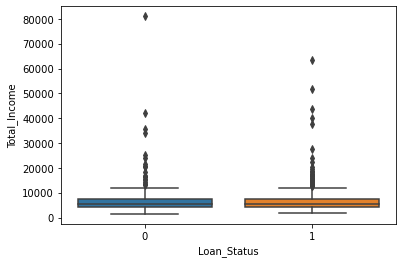

In [144]:
# Bivariate Analysis
sns.boxplot(x='Loan_Status', y='Total_Income', data=new_train)

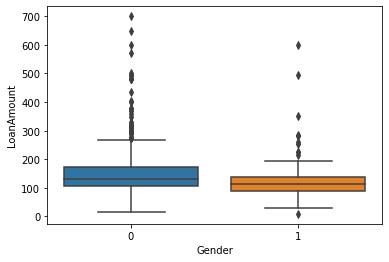

In [145]:
sns.boxplot(x='Gender', y='LoanAmount', data=new_train)

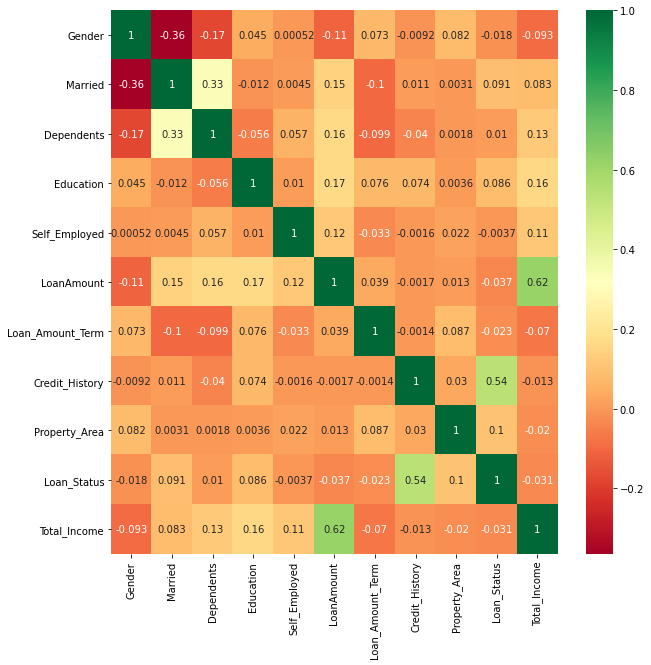

In [146]:
# Correlation matrix
plt.figure(figsize = (10,10))
sns.heatmap(new_train.corr(), annot=True, cmap='RdYlGn')

In [147]:
# Creating X (input variables) and Y (Target Variable) from the new_train data.
x = new_train.drop('Loan_Status', axis='columns')
y = new_train['Loan_Status']

In [148]:
from sklearn.model_selection import train_test_split

with pd.option_context('mode.chained_assignment', None):
    train_X,val_X,train_y, val_y= train_test_split(X,y, test_size=0.25, 
                                            shuffle=True,random_state=0,stratify=y)
print("The shape of the Train Dataset and Validation Dataset is",train_X.shape[0], val_X.shape[0]," respectively")

The shape of the Train Dataset and Validation Dataset is 460 154  respectively


In [150]:
df_model = DecisionTreeClassifier()
df_model.fit(train_X, train_y)
predict_y = df_model.predict(val_X)
print(classification_report(val_y, predict_y))
print("Accuracy:", accuracy_score(predict_y, val_y))

              precision    recall  f1-score   support

           0       0.59      0.60      0.60        48
           1       0.82      0.81      0.82       106

    accuracy                           0.75       154
   macro avg       0.71      0.71      0.71       154
weighted avg       0.75      0.75      0.75       154

Accuracy: 0.7467532467532467


In [152]:
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(train_X, train_y)
predict_y_2 = rf_model.predict(val_X)
print(classification_report(val_y, predict_y_2))
print("Accuracy:", accuracy_score(predict_y_2, val_y))

              precision    recall  f1-score   support

           0       0.77      0.48      0.59        48
           1       0.80      0.93      0.86       106

    accuracy                           0.79       154
   macro avg       0.78      0.71      0.73       154
weighted avg       0.79      0.79      0.78       154

Accuracy: 0.7922077922077922


In [154]:
lr_model = LogisticRegression(solver='lbfgs', multi_class='auto')
lr_model.fit(train_X, train_y)
predict_y_3 = lr_model.predict(val_X)
print(classification_report(val_y, predict_y_3))
print("Accuracy:", accuracy_score(predict_y_3, val_y))

              precision    recall  f1-score   support

           0       0.88      0.46      0.60        48
           1       0.80      0.97      0.88       106

    accuracy                           0.81       154
   macro avg       0.84      0.72      0.74       154
weighted avg       0.82      0.81      0.79       154

Accuracy: 0.8116883116883117
